# K-Fold Cross Validation on Digits

### Question: Which ML Model should I use to classify digits dataset ?

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

# seperate X and y
X = digits.data    # independent variables
y = digits.target  # dependedent variable

In [28]:
# lets view the 1st image
idx=0
print(X[idx])
print(y[idx])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0


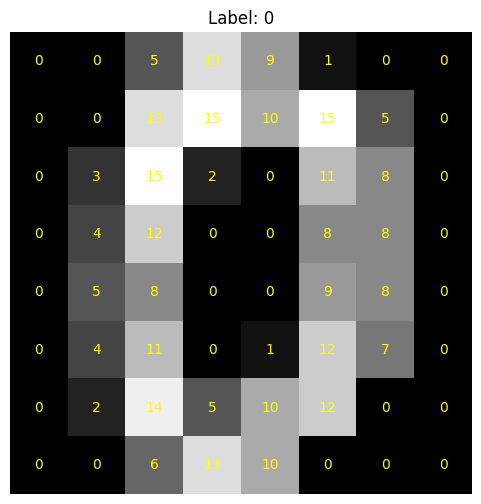

In [32]:
# lets view the image
# (OPTIONAL)

import matplotlib.pyplot as plt
import numpy as np

# Reshape the first image (8x8)
idx = 0
first_image = X[idx].reshape(8, 8)

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {y[idx]}")
plt.axis('off')

# Add numbers inside each cell
for i in range(8):
    for j in range(8):
        plt.text(j, i, int(first_image[i, j]),
                 ha="center", va="center",
                 color="yellow", fontsize=10)

plt.show()


In [34]:
print(X.shape) # rows,col

(1797, 64)


In [4]:
# 2

# Without cross validation:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Logistic Regression**

In [38]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(solver='liblinear', multi_class='ovr')

model_lr.fit(X_train, y_train)

model_lr.score(X_test, y_test)

0.9098497495826378

**SVM**

In [39]:
### Support Vector Machine: Classifier
from sklearn.svm import SVC

model_svc = SVC(gamma="auto")

model_svc.fit(X_train, y_train)

model_svc.score(X_test, y_test)

0.5125208681135225

**Random Forest**

In [40]:
### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(n_estimators=40) # 40 trees

model_rfc.fit(X_train, y_train)

model_rfc.score(X_test, y_test)

0.9265442404006677

In [10]:
# 3

## K-Fold cross validation (using cross_val_score function)

In [41]:
from sklearn.model_selection import cross_val_score

**Logistic regression model performance using cross_val_score**

In [45]:
# logistic regression
model_lr = LogisticRegression(solver='liblinear', multi_class='ovr')

scores_lr = cross_val_score(model_lr, X, y, cv=3) # folds=3

print(scores_lr)
print("Average for lr:", np.mean(scores_lr))

[0.89482471 0.95325543 0.90984975]
Average for lr: 0.9193099610461881


**svm model performance using cross_val_score**

In [46]:
# svm
model_svc = SVC(gamma="auto")

scores_svc = cross_val_score(model_svc, X, y, cv=3)

print(scores_svc)
print("Average for svc:", np.mean(scores_svc))

[0.38063439 0.41068447 0.51252087]
Average for svc: 0.4346132442960489


**random forest performance using cross_val_score**

In [47]:
# RFC
model_rfc = RandomForestClassifier(n_estimators=40) # 40 trees

scores_rfc = cross_val_score(model_rfc, X, y, cv=3)

print(scores_rfc)
print("Average for rfc:", np.mean(scores_rfc))

[0.92821369 0.94991653 0.92654424]
Average for rfc: 0.9348914858096827


## **cross_val_score uses stratifield kfold by default**

### Conlclusion: RFC is better than all other 

In [15]:
# 4

# You can even perform hyperparameter tuning using k fold cross validation on RandomForestClassifier

In [48]:
# Parameter tuning on RFC: Here I am tuning the hyperparameter n_estimators=5, 20, 30, 40

scores_rfc5 = cross_val_score(RandomForestClassifier(n_estimators=5), X, y, cv=10)
np.mean(scores_rfc5)

0.8686840471756673

In [49]:
scores_rfc20 = cross_val_score(RandomForestClassifier(n_estimators=20), X, y, cv=10)
np.mean(scores_rfc20)

0.9315270018621973

In [50]:
scores_rfc30 = cross_val_score(RandomForestClassifier(n_estimators=30), X, y, cv=10)
np.mean(scores_rfc30)

0.9449068901303537

In [51]:
scores_rfc40 = cross_val_score(RandomForestClassifier(n_estimators=40), X, y, cv=10)
np.mean(scores_rfc40)

0.9398944754810676

## Conclusion: Random forest classifier (30 trees) gives best result on digits dataset 

In [20]:
# 5

# KFold cross validation (manually)

In [21]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)
print(k_fold)

KFold(n_splits=5, random_state=None, shuffle=False)


In [22]:
# following return a k-fold iterator

data = [1, 2, 3, 4, 5, 6, 7, 8, 9]

print("  train-index   test-index")
for train_idx, test_idx in  k_fold.split(data):
    print(train_idx, test_idx)

  train-index   test-index
[2 3 4 5 6 7 8] [0 1]
[0 1 4 5 6 7 8] [2 3]
[0 1 2 3 6 7 8] [4 5]
[0 1 2 3 4 5 8] [6 7]
[0 1 2 3 4 5 6 7] [8]


In [23]:
# create a function that would take input the model, training, testing data and return the score
def get_model_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    return score

#######################

from sklearn.model_selection import StratifiedKFold # SKF ensures that the validation dataset is of same proportion as original DS
k_fold = StratifiedKFold(n_splits=3)

scores_lr  = []
scores_svc = []
scores_rfc = []

for train_idx, test_idx in  k_fold.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    scores_lr.append(get_model_score(model_lr, X_train, X_test, y_train, y_test))
    scores_svc.append(get_model_score(model_svc, X_train, X_test, y_train, y_test))
    scores_rfc.append(get_model_score(model_rfc, X_train, X_test, y_train, y_test))

################

import numpy as np
print("scores_lr :", np.round(scores_lr,3))
print("scores_svc:", np.round(scores_svc,3))
print("scores_rfc:", np.round(scores_rfc,3))

#########################
# Show me the average
print("Average for lr:", np.mean(scores_lr))
print("Average for svc:", np.mean(scores_svc))
print("Average for rfc:", np.mean(scores_rfc))

# Observ: RFC is better than all other 

scores_lr : [0.895 0.953 0.91 ]
scores_svc: [0.381 0.411 0.513]
scores_rfc: [0.922 0.953 0.922]
Average for lr: 0.9193099610461881
Average for svc: 0.4346132442960489
Average for rfc: 0.9321090706733445
